*This notebook is particularly designed for Capstone project by Raj Aryan Sharma*


# **Predicting Stars, Galaxy, & Quasar with ML Model**



<img src="https://static.scientificamerican.com/dam/m/115e9361b4f0cbed/original/NGC-604.jpg?m=1736436990.163&w=1200" width="600" height="400">


Workflow of this notebook


1.   Introducing Dataset
2.   Importing Libraries and modules for this notebook
3.   Exploring Dataset
4.   Preparing data for our model
5.   Scaling the data for our model
6.   Building the ML models and checking the results
7.   Fine tuning and Revaluating
8.   Building Report
9.   Building a Streamlit App



# **Importing necessary libraries and modules for the dataset**

First we need to import all the packages we need. Numpy and pandas for data manipulation, matplotlib and seaborn for data visualization and all the modules from sklearn for the machine learning.

In [2]:
import os # operating system module

import numpy as np # data manipulation
import pandas as pd # data handling and manipulation

import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

import tensorflow as tf # machine learning module
from tensorflow import keras # machine learning module

from sklearn.model_selection import train_test_split # data preprocessing
from sklearn.preprocessing import StandardScaler # data preprocessing
from sklearn.preprocessing import LabelEncoder # data preprocessing
from imblearn.over_sampling import SMOTE # data preprocessing

from sklearn.metrics import accuracy_score # model evaluation
from sklearn.metrics import confusion_matrix # model evaluation
from sklearn.metrics import classification_report # model evaluation
from sklearn.model_selection import StratifiedKFold # Model Selection

from sklearn.linear_model import LogisticRegression # machine learning model
from sklearn.neighbors import KNeighborsClassifier # machine learning model
from sklearn.svm import SVC # machine learning model
from sklearn.ensemble import RandomForestClassifier # machine learning model
from sklearn.ensemble import AdaBoostClassifier # machine learning model
from xgboost import XGBClassifier # machine learning model

import warnings
warnings.filterwarnings('ignore')




## **Importing Data**






In [3]:
data = pd.read_csv('Stellar_Object.csv')

In [4]:
data.head(5)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
data.shape

(100000, 18)

In [6]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


Photometric data contains corrupted or missing data cells that has been holded by extreme negatives (-9999) as placeholder. To handle this we need to convert them into null values and drop the observations

In [7]:
data.replace([-9999],np.nan,inplace=True)
data.dropna(inplace=True)

In [8]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,9.999900e+04,99999.000000,99999.000000,99999.000000,99999.000000
mean,1.237665e+18,177.628653,24.135552,22.080679,20.631583,19.645777,19.084865,18.768988,4481.403354,301.0,3.511625,186.127011,5.783903e+18,0.576667,5137.027890,55588.653687,449.315613
std,8.438450e+12,96.502612,19.644608,2.251068,2.037384,1.854763,1.757900,1.765982,1964.739021,0.0,1.586913,149.007687,3.324026e+18,0.730709,2952.312485,1808.492217,272.498252
min,1.237646e+18,0.005528,-18.785328,10.996230,10.498200,9.822070,9.469903,9.612333,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.517698,5.147477,20.352410,18.965240,18.135795,17.732280,17.460830,3187.000000,301.0,2.000000,82.000000,2.844137e+18,0.054522,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900527,23.646462,22.179140,21.099930,20.125310,19.405150,19.004600,4188.000000,301.0,4.000000,146.000000,5.614896e+18,0.424176,4987.000000,55869.000000,433.000000
75%,1.237668e+18,233.895005,39.901582,23.687480,22.123775,21.044790,20.396510,19.921120,5326.000000,301.0,5.000000,241.000000,8.332365e+18,0.704172,7400.500000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99999 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   obj_ID       99999 non-null  float64
 1   alpha        99999 non-null  float64
 2   delta        99999 non-null  float64
 3   u            99999 non-null  float64
 4   g            99999 non-null  float64
 5   r            99999 non-null  float64
 6   i            99999 non-null  float64
 7   z            99999 non-null  float64
 8   run_ID       99999 non-null  int64  
 9   rerun_ID     99999 non-null  int64  
 10  cam_col      99999 non-null  int64  
 11  field_ID     99999 non-null  int64  
 12  spec_obj_ID  99999 non-null  float64
 13  class        99999 non-null  object 
 14  redshift     99999 non-null  float64
 15  plate        99999 non-null  int64  
 16  MJD          99999 non-null  int64  
 17  fiber_ID     99999 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1

After removing the corrupted observation we have 99999 observations. Dataset contains 17 columns being the predictors and 1 target variable.

## As the dependent variable is categorical, it must be converted into numerical form through encoding before being used in the model

Label Encoding is a way to convert these categories into numbers. It assigns a unique number to each category so that the model can process and learn from the data. You can read more about Label Encoder here

In [10]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

In [11]:
data.head(3)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,0,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,0,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,0,0.644195,4576,55592,299


# Data visualization

<Axes: xlabel='class', ylabel='count'>

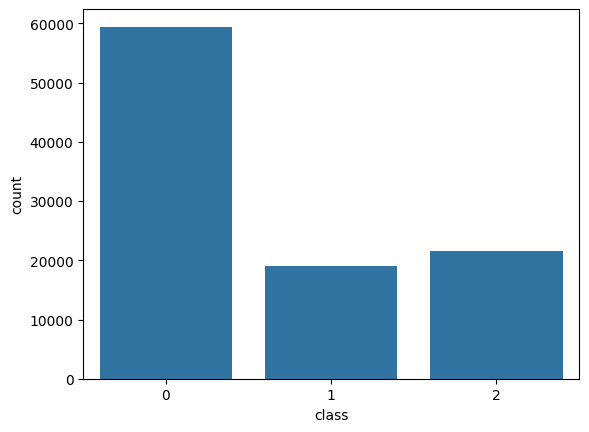

In [12]:
sns.countplot(x=data['class'])

<Axes: xlabel='redshift', ylabel='Density'>

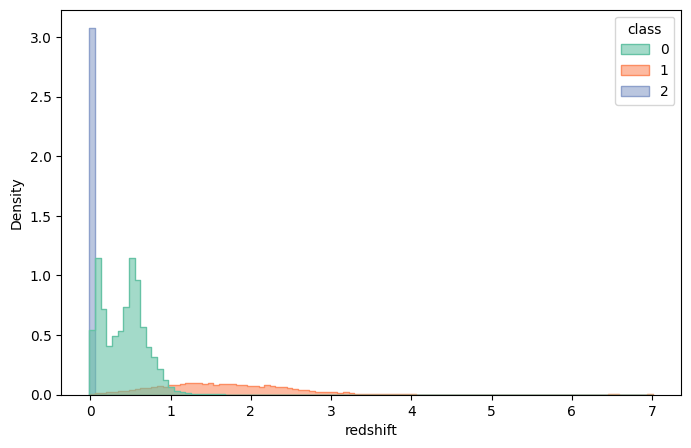

In [13]:
plt.figure(figsize=(8,5))
sns.histplot(data=data, x="redshift", hue="class", bins=100, palette="Set2", alpha=0.6, element="step", stat="density")

Text(0.5, 1.0, 'Feature Correlation Heatmap')

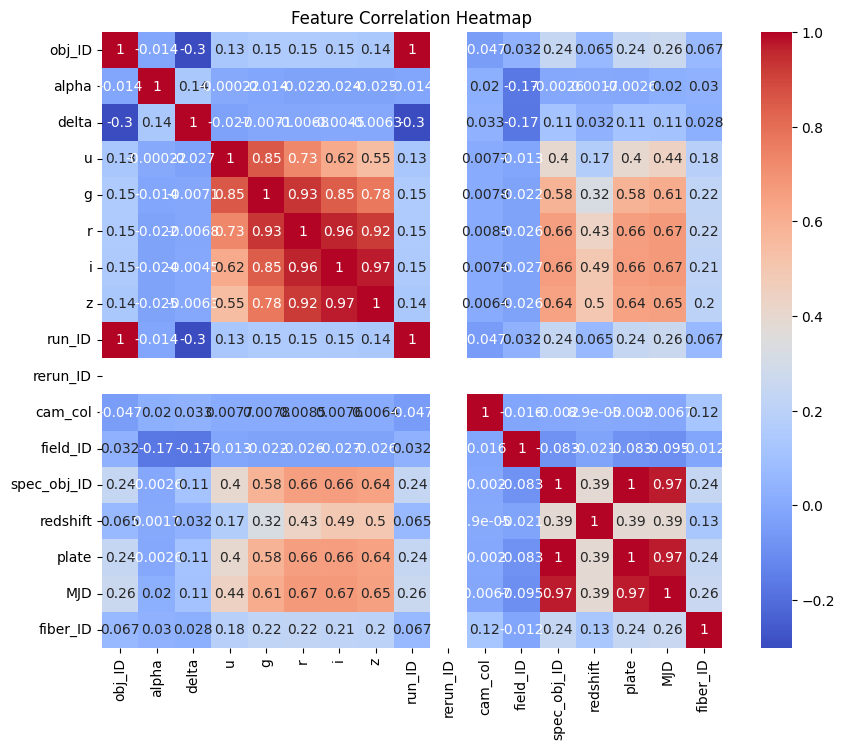

In [14]:
numdata = data[["obj_ID", "alpha", "delta","u","g","r","i","z","run_ID","rerun_ID","cam_col","field_ID","spec_obj_ID","redshift","plate","MJD","fiber_ID"]]


corr = numdata.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")


## Pair plot

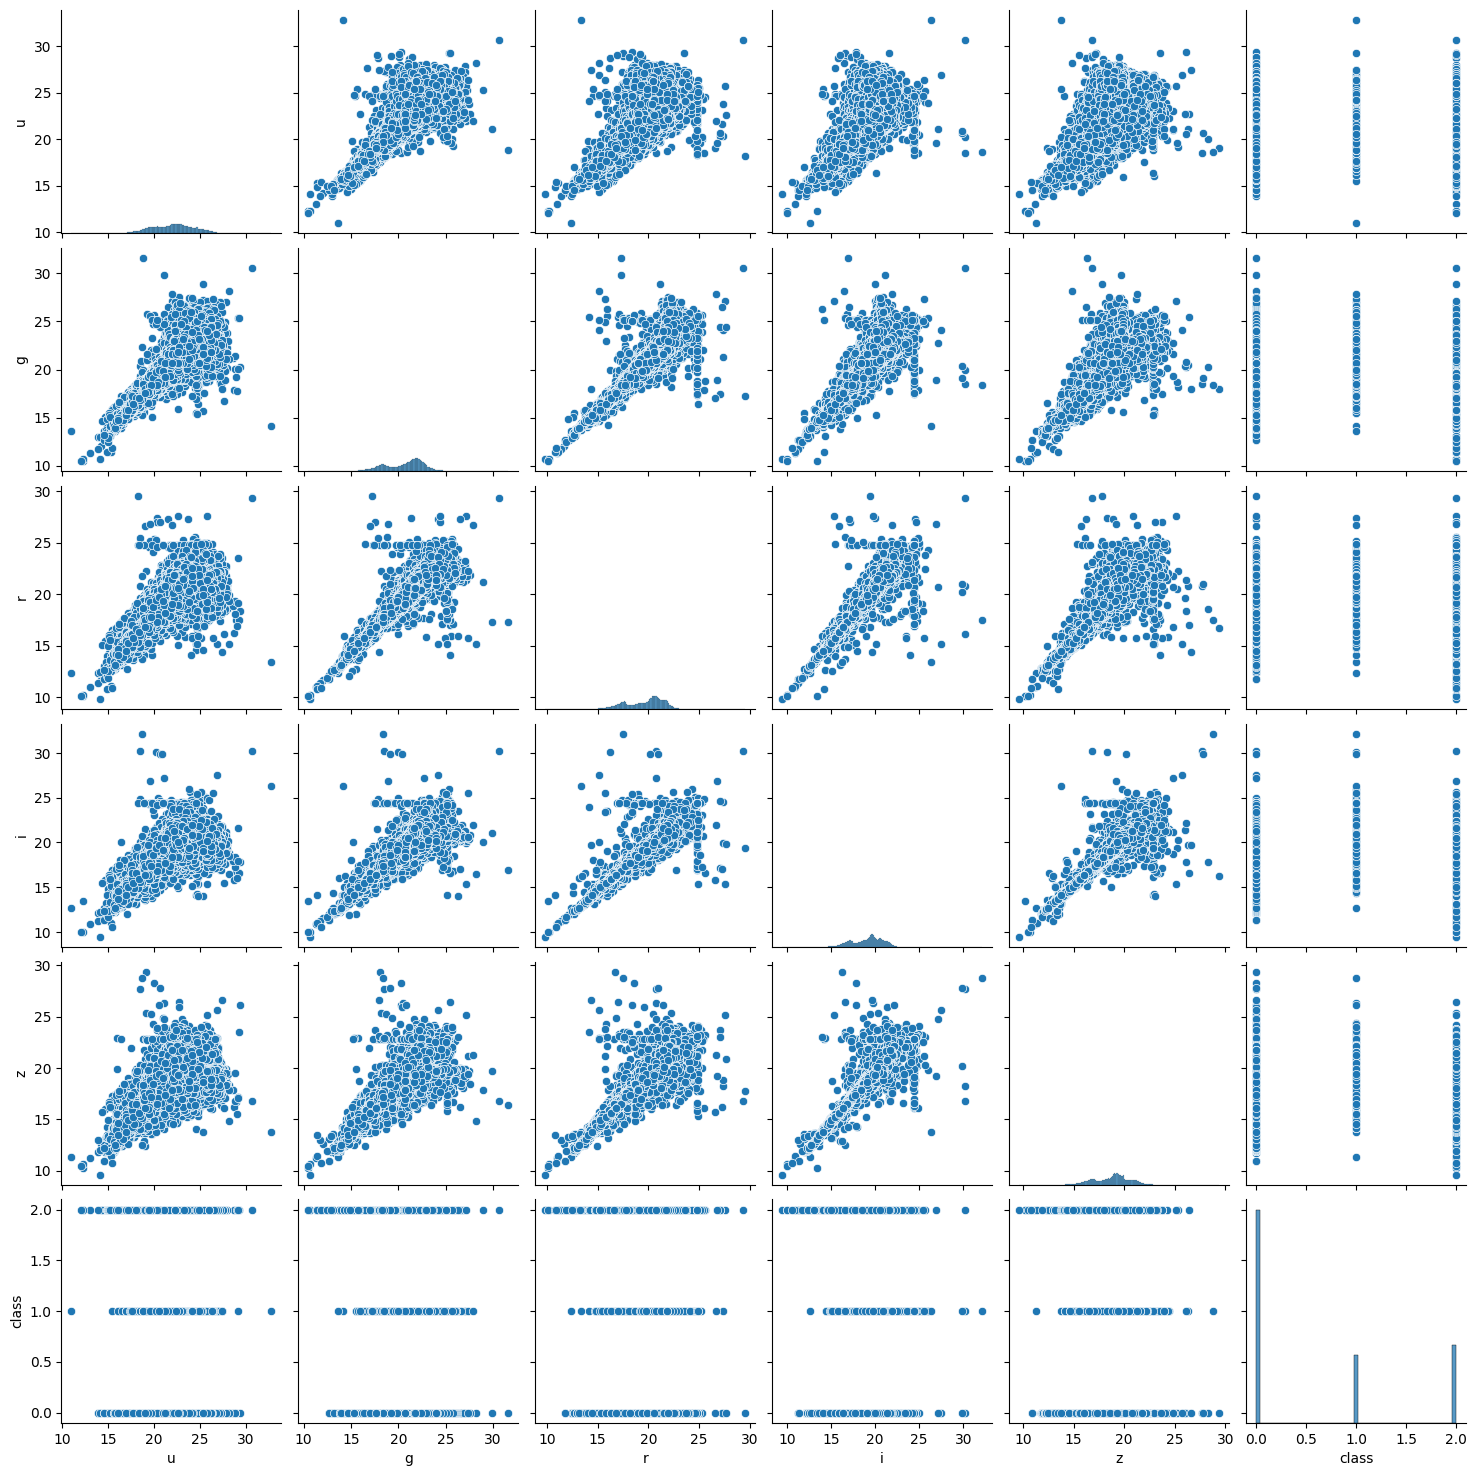

In [15]:
sns.pairplot(data[['u','g','r','i','z','class']])

before Removing Extreme negative **(corrupted observation)**

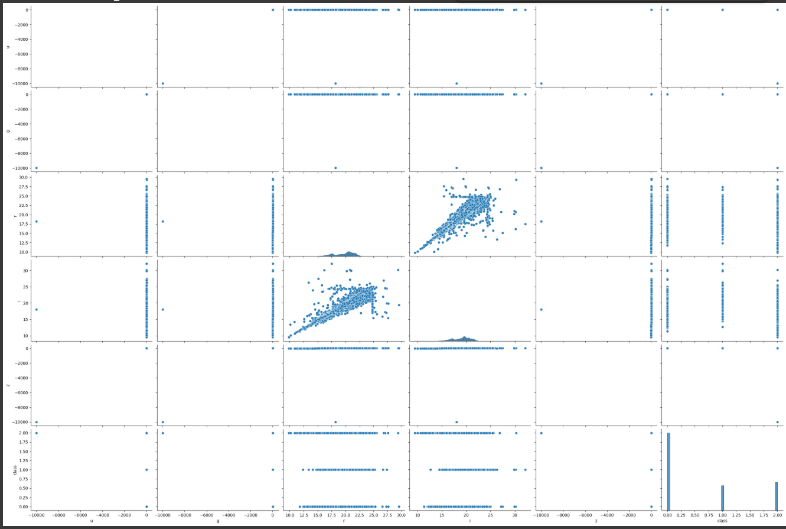

# Feature engineering

In [16]:
photometric_data = ['u', 'g', 'r', 'i', 'z']


data["u-g"] = data["u"] - data["g"]
data["g-r"] = data["g"] - data["r"]
data["r-i"] = data["r"] - data["i"]
data["i-z"] = data["i"] - data["z"]

data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,...,spec_obj_ID,class,redshift,plate,MJD,fiber_ID,u-g,g-r,r-i,i-z
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,...,6.543777e+18,0,0.634794,5812,56354,171,1.60352,1.88029,1.22928,0.37202
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,...,1.176014e+19,0,0.779136,10445,58158,427,1.94571,0.24744,1.41632,-0.44615
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,...,5.152200e+18,0,0.644195,4576,55592,299,2.59918,2.05413,1.26119,0.40030
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,...,1.030107e+19,0,0.932346,9149,58039,775,-1.63974,2.16494,1.10708,1.25444
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,...,6.891865e+18,0,0.116123,6121,56187,842,1.85690,1.08281,0.52036,0.43250


These new features "color indices" will help us differentiate between colors of the celestial object. Whereas, Photometric data is defining the brightness of a celestial object

Blue color (hot stars): Low (𝑢−𝑔), because they are bright in the ultraviolet (u-band).

Red color (cool stars/galaxies): High (𝑟−𝑖)
(𝑖−𝑧), because they emit more strongly in red/infrared.

Quasars: Very distinct in some indices (like unusual (𝑢−𝑔)) because of their strong emission lines and high redshift.

# Data Preprocessing

# Feature selection

In [17]:
y = data['class']
X1 = data.drop(['class'], axis=1)
X2 = data.drop(['class','g','i','plate'], axis=1)
X3 = data.drop(['class','obj_ID','run_ID','rerun_ID','field_ID','spec_obj_ID','plate','MJD','fiber_ID'], axis=1)
X4 = data.drop(['class','obj_ID','run_ID','rerun_ID','field_ID','spec_obj_ID','plate','MJD','fiber_ID','g','i'], axis=1)



# Data preprocessing

In [18]:
scaler = StandardScaler()
X1_Scaled = scaler.fit_transform(X1)
X2_Scaled = scaler.fit_transform(X2)
X3_Scaled = scaler.fit_transform(X3)
X4_Scaled = scaler.fit_transform(X4)


# Model Building

In [19]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
}

In [20]:
datasets = {
    "Dataset 1 (Complete)": X1_Scaled,
    "Dataset 2 (No Multicollinearity)": X2_Scaled,
    "Dataset 3 (No Insignificant)": X3_Scaled,
    "Dataset 4 (Both Removed)": X4_Scaled
}


In [21]:
splits = [0.4,0.3,0.25,0.2,0.1]

In [22]:
results = []

In [24]:
for dataset_name , dataset in datasets.items():
        for test_size in splits:
            X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size=test_size, random_state=42)
            smote = SMOTE(random_state=42)
            X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
            for model_name,model in models.items():
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                results.append([dataset_name, test_size, model_name, accuracy])

In [25]:
results_df = pd.DataFrame(results, columns=["Dataset", "Test Size", "Model", "Accuracy"])

In [26]:
pivot = results_df.pivot_table(index=['Test Size','Dataset'], columns='Model', values='Accuracy')
pivot = pivot.sort_index(level=0, ascending = False)
print(pivot.to_string())

Model                                       AdaBoost       KNN  Logistic Regression  Random Forest   XGBoost
Test Size Dataset                                                                                           
0.40      Dataset 4 (Both Removed)          0.916800  0.932225             0.954625       0.978375  0.976725
          Dataset 3 (No Insignificant)      0.920225  0.929050             0.954625       0.977250  0.976575
          Dataset 2 (No Multicollinearity)  0.900500  0.922500             0.956250       0.977612  0.978200
          Dataset 1 (Complete)              0.898525  0.920775             0.956250       0.977075  0.977450
0.30      Dataset 4 (Both Removed)          0.914800  0.933733             0.955100       0.977967  0.976367
          Dataset 3 (No Insignificant)      0.913633  0.930700             0.955100       0.977233  0.976167
          Dataset 2 (No Multicollinearity)  0.932500  0.924967             0.956033       0.977767  0.977200
          Dataset 1

# Model Selection

## Stratified K-Fold cross validation

In [27]:
Fine_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Random_Forest": RandomForestClassifier(n_estimators=40),
}

In [28]:
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

In [29]:
Finalresults=[]

In [30]:
for dataset_name , dataset in datasets.items():
    for model_name,model in Fine_models.items():
      fold_accuracies = []
      for train_index, test_index in skf.split(dataset, y):
          X_train, X_test = dataset[train_index], dataset[test_index]
          y_train, y_test = y.iloc[train_index], y.iloc[test_index]

          smote = SMOTE(random_state=42)
          X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

          model.fit(X_train_resampled, y_train_resampled)
          y_pred = model.predict(X_test)

          accuracy = accuracy_score(y_test, y_pred)
          fold_accuracies.append(accuracy)

          mean_acc = np.mean(fold_accuracies)

          Finalresults.append([dataset_name,model_name,mean_acc])

In [31]:
Finalresult = pd.DataFrame(Finalresults, columns=["Dataset", "Model", "Mean Accuracy"])

In [32]:
pivot = Finalresult.pivot_table(index='Dataset', columns='Model', values='Mean Accuracy')
pivot = pivot.sort_index(level=0, ascending = False)
print(pivot.to_string())

Model                             Logistic Regression  Random_Forest   XGBoost
Dataset                                                                       
Dataset 4 (Both Removed)                     0.945588       0.978232  0.976971
Dataset 3 (No Insignificant)                 0.945717       0.976675  0.977006
Dataset 2 (No Multicollinearity)             0.949376       0.978174  0.978256
Dataset 1 (Complete)                         0.949592       0.976722  0.978350


1. Tree-based models like XGBoost handle irrelevant features well

Logistic Regression suffers if you keep noisy or multicollinear features → it inflates variance.

XGBoost, however, splits only on features that improve gain. If a column is useless, it just won’t use it.

So even with “extra” features, XGBoost can ignore them, but if those features carry tiny but useful signals, it will pick them up.

2. Overfitting risk

High accuracy (>0.97) on test splits is great, but with IDs included, the model may memorize survey-specific patterns rather than learning general astrophysical differences.
That’s why:

For deployment on new telescope data, Dataset 3 or 4 (cleaned features) is safer.

For SDSS-only classification, Dataset 1 might indeed be best

## Final Selection:
* Model:XGboost
* Dataset: X4(both multicollinearity and insignificant variables removed)
* Evaluation: Stratified K-fold cross validation
* Fine tuning: GridSearch
* Class Imbalance: SMOTE (over_sampling). *only for model training not applicable in web app UI*
* SCALER file (.pkl)
* Model file (.pkl)






# Fine Tuned Final model

In [33]:
xgb = XGBClassifier(use_label_encoder=False,eval_metric='mlogloss',random_state=42)

In [34]:
param_dist ={
    "n_estimators":[50,100,150,200,250,300,350],
    "max_depth":[5,10,15,20,25,30,35,40,45,50],
    "learning_rate":[0.01,0.05,0.1,0.2,0.3,0.4,0.5],
    "subsample":[0.5,0.6,0.7,0.8,0.9,1],
    "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]}


In [35]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist,n_iter=50, cv=cv, scoring='accuracy', n_jobs=-1,verbose=2,random_state=42)

In [38]:
random_search.fit(X4_Scaled,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=Non...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3, 0.4, 0.5],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1]},
                   random_state=42, scoring='accuracy', verbose=2)

In [39]:
print(random_search.best_params_)
print(random_search.best_score_)

{'subsample': 0.8, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1}
0.9780997814890746


### DOWNLOAD SCALER AND MODEL

In [40]:
import joblib
joblib.dump(random_search.best_estimator_, "stellar_object_classifier_model.pkl")
joblib.dump(scaler, "scaler.joblib")

['scaler.joblib']

In [41]:
from google.colab import files
files.download("stellar_object_classifier_model.pkl")
files.download("scaler.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [43]:
joblib.dump(random_search.best_estimator_, "stellar_object_classifier_model.pkl")
files.download("stellar_object_classifier_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')